# TLKM.JK Stock Price Prediction using LSTM (Long Short Term Memory)
Multivariate Time Series Forecasting

## 1. Data Preparation

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
# Download TLKM.JK from 18 September 2012 - 18 September 2022
df = yf.download('TLKM.JK', start='2012-09-18', end='2022-09-18')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18 00:00:00+07:00,1880.0,1880.0,1850.0,1880.0,1451.125366,72222500
2012-09-19 00:00:00+07:00,1880.0,1910.0,1870.0,1880.0,1451.125366,117850000
2012-09-20 00:00:00+07:00,1880.0,1880.0,1850.0,1880.0,1451.125366,56595000
2012-09-21 00:00:00+07:00,1880.0,1890.0,1860.0,1880.0,1451.125366,56237500
2012-09-24 00:00:00+07:00,1850.0,1880.0,1840.0,1850.0,1427.969116,54650000


### 1.1. Features Creation

Useful references:
- https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/#:~:text=Method%201%3A%20Using%20Numpy,-Numpy%20module%20of&text=cumsum()%20which%20returns%20the,of%20elements%20by%20window%20size.

#### 1.1.1. 7 DAYS MA

In [6]:
close_series = df['Close']

# Get the window of close series
window_size_7 = 7 # 7 for 7 days moving average
windows_7 = close_series.rolling(window_size_7)

# Create a series of moving averages of each window
moving_averages_7 = windows_7.mean()

In [7]:
df2 = df[:]
df2['7 DAYS MA'] = moving_averages_7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 1.1.2. 14 DAYS MA

In [8]:
# Get the window of close series
window_size_14 = 14 # 14 for 14 days moving average
windows_14 = close_series.rolling(window_size_14)

# Create a series of moving averages of each window
moving_averages_14 = windows_14.mean()

In [9]:
df2['14 DAYS MA'] = moving_averages_14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 1.1.3. 21 DAYS MA

In [10]:
# Get the window of close series
window_size_21 = 21 # 21 for 21 days moving average
windows_21 = close_series.rolling(window_size_21)

# Create a series of moving averages of each window
moving_averages_21 = windows_21.mean()

In [11]:
df2['21 DAYS MA'] = moving_averages_21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 1.1.4. 7 DAYS STD

In [12]:
# Get the window of close series
windows_7_std = close_series.rolling(window_size_7)

# Create a series of moving averages of each window
std_7 = windows_7_std.std()

In [13]:
df2['7 DAYS STD DEV'] = std_7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
# Check nan values after adding new features above
df2.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          6
14 DAYS MA        13
21 DAYS MA        20
7 DAYS STD DEV     6
dtype: int64

In [15]:
# Drop null values
df2 = df2.dropna()
df2.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
7 DAYS MA         0
14 DAYS MA        0
21 DAYS MA        0
7 DAYS STD DEV    0
dtype: int64

In [16]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
Date,,,,,,,,,,
2012-10-16 00:00:00+07:00,1970.0,1970.0,1920.0,1970.0,1520.593872,95815000,1935.714286,1913.571429,1898.571429,18.126539
2012-10-17 00:00:00+07:00,1950.0,1970.0,1940.0,1950.0,1505.156494,133372500,1940.000000,1919.285714,1901.904762,17.320508
2012-10-18 00:00:00+07:00,1930.0,1960.0,1920.0,1930.0,1489.719116,64702500,1940.000000,1922.142857,1904.285714,17.320508
2012-10-19 00:00:00+07:00,1930.0,1960.0,1930.0,1930.0,1489.719116,71067500,1940.000000,1925.714286,1906.666667,17.320508
2012-10-22 00:00:00+07:00,1910.0,1940.0,1910.0,1910.0,1474.281494,62315000,1934.285714,1926.428571,1908.095238,19.880596


#### 1.1.5. Date related features

In [17]:
df2.index = pd.to_datetime(df2.index)

In [18]:
def create_date_features(df):
  """
  Create time series features based on time series index - Date.
  """
  res = df.copy()
  res['dayofweek'] = df.index.dayofweek
  res['quarter'] = df.index.quarter
  res['month'] = df.index.month
  res['year'] = df.index.year
  res['dayofyear'] = df.index.dayofyear
  res['dayofmonth'] = df.index.day
  res['weekofyear'] = df.index.isocalendar().week
  return res


In [19]:
df3 = create_date_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,
2012-10-16 00:00:00+07:00,1970.0,1970.0,1920.0,1970.0,1520.593872,95815000,1935.714286,1913.571429,1898.571429,18.126539,1,4,10,2012,290,16,42
2012-10-17 00:00:00+07:00,1950.0,1970.0,1940.0,1950.0,1505.156494,133372500,1940.000000,1919.285714,1901.904762,17.320508,2,4,10,2012,291,17,42
2012-10-18 00:00:00+07:00,1930.0,1960.0,1920.0,1930.0,1489.719116,64702500,1940.000000,1922.142857,1904.285714,17.320508,3,4,10,2012,292,18,42
2012-10-19 00:00:00+07:00,1930.0,1960.0,1930.0,1930.0,1489.719116,71067500,1940.000000,1925.714286,1906.666667,17.320508,4,4,10,2012,293,19,42
2012-10-22 00:00:00+07:00,1910.0,1940.0,1910.0,1910.0,1474.281494,62315000,1934.285714,1926.428571,1908.095238,19.880596,0,4,10,2012,296,22,43


#### 1.1.6. Drop Features (Open, High, Low, Adj Close, Volume)

In [20]:
features = ['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', 
            '7 DAYS STD DEV', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']

In [21]:
df4 = df3[features]
close_col = df4.pop('Close')
df4.insert(11,'Close',close_col)
df4.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-16 00:00:00+07:00,1935.714286,1913.571429,1898.571429,18.126539,1,4,10,2012,290,16,42,1970.0
2012-10-17 00:00:00+07:00,1940.000000,1919.285714,1901.904762,17.320508,2,4,10,2012,291,17,42,1950.0
2012-10-18 00:00:00+07:00,1940.000000,1922.142857,1904.285714,17.320508,3,4,10,2012,292,18,42,1930.0
2012-10-19 00:00:00+07:00,1940.000000,1925.714286,1906.666667,17.320508,4,4,10,2012,293,19,42,1930.0
2012-10-22 00:00:00+07:00,1934.285714,1926.428571,1908.095238,19.880596,0,4,10,2012,296,22,43,1910.0


In [22]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [31]:
# Save pre-processed data to csv
df4.to_csv('/drive/My Drive/IF5171 [TUBES] Pembelajaran Mesin DSAI/4. Progress Report/experiments/LSTM/TLKM/clean_tlkm10y.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/drive')
# df4 = pd.read_csv('/drive/My Drive/IF5171 [TUBES] Pembelajaran Mesin DSAI/4. Progress Report/experiments/LSTM/preprocessed_tlkm2.csv')

## 2. EDA

Text(0, 0.5, 'Prices ($)')

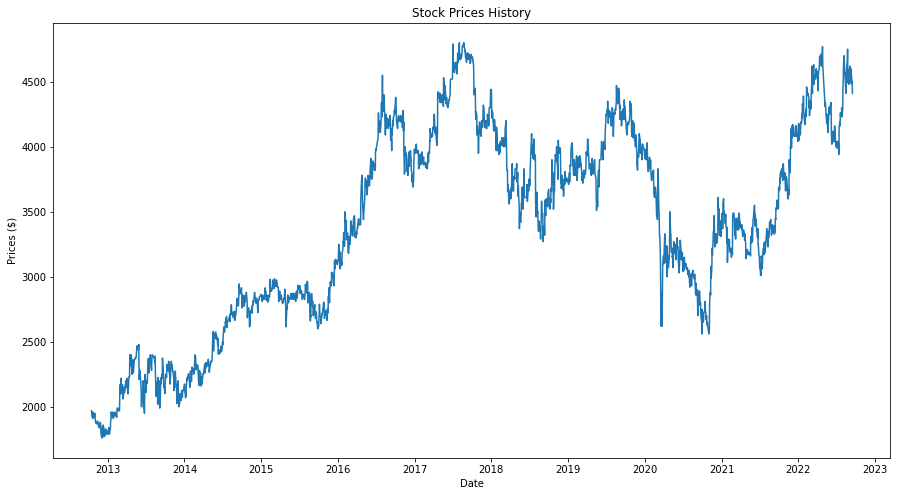

In [24]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df2['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

The TLKM shows an upward trend over the years. However, due to COVID19 pandemic in December 2019, the price decreased dramatically until the end of the year 2020. The close price of TLKM stocks then gradually rises.

In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2460 entries, 2012-10-16 00:00:00+07:00 to 2022-09-16 00:00:00+07:00
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   7 DAYS MA       2460 non-null   float64
 1   14 DAYS MA      2460 non-null   float64
 2   21 DAYS MA      2460 non-null   float64
 3   7 DAYS STD DEV  2460 non-null   float64
 4   dayofweek       2460 non-null   int64  
 5   quarter         2460 non-null   int64  
 6   month           2460 non-null   int64  
 7   year            2460 non-null   int64  
 8   dayofyear       2460 non-null   int64  
 9   dayofmonth      2460 non-null   int64  
 10  weekofyear      2460 non-null   UInt32 
 11  Close           2460 non-null   float64
dtypes: UInt32(1), float64(5), int64(6)
memory usage: 242.6 KB


In [26]:
df4.describe()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3395.221835,3391.475319,3387.676732,55.091391,1.986992,2.497561,6.489024,2017.266260,182.064634,15.715447,26.481707,3398.333333
std,767.716087,766.763510,766.037074,33.555329,1.413003,1.120075,3.455798,2.856939,105.474976,8.724625,15.071123,769.267413
min,1795.714286,1803.571429,1804.285714,0.000000,0.000000,1.000000,1.000000,2012.000000,1.000000,1.000000,1.000000,1760.000000
25%,2815.178571,2814.196429,2810.238095,32.099173,1.000000,1.000000,3.000000,2015.000000,90.000000,8.000000,13.000000,2815.000000
50%,3465.714286,3444.642857,3439.047619,47.933479,2.000000,3.000000,7.000000,2017.000000,182.000000,16.000000,26.000000,3480.000000
75%,4031.428571,4025.535714,4021.428571,68.918080,3.000000,3.000000,9.000000,2020.000000,274.000000,23.000000,40.000000,4040.000000
max,4780.000000,4755.714286,4740.476190,294.019760,4.000000,4.000000,12.000000,2022.000000,365.000000,31.000000,53.000000,4800.000000


In [27]:
corr_data = df4.corr()

In [28]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [29]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

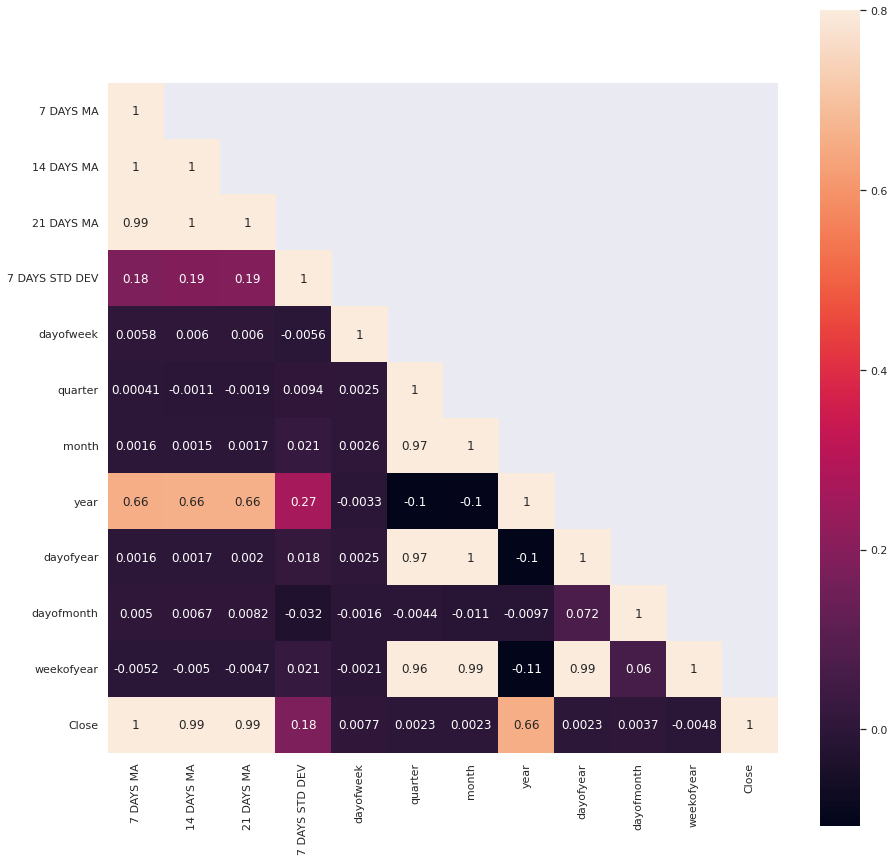

In [30]:
plot_corr_coef(corr_data)

From the correlation coefficient plot above, it can be seen that moving averages: 7 days, 14 days, and 21 days have strong positive correlations to Close price.